In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle
!kaggle competitions list

ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                               2025-11-03 23:59:00  Featured         1,000,000 Usd        512           False  
https://www.kaggle.com/competitions/openai-to-z-challenge                        2025-06-29 23:59:00  Featured           400,000 Usd          0           False  
https://www.kaggle.com/competitions/make-data-count-finding-data-references      2025-09-09 23:59:00  Research           100,000 Usd        138           False  
https://www.kaggle.com/competitions/waveform-inversion                           2025-06-30 23:59:00  Research            50,000 Usd       1253           False  
https://www.kaggle.com/compe

In [ ]:
!kaggle competitions download -c bosch-production-line-performance

 96% 653M/680M [00:07<00:00, 233MB/s]
100% 680M/680M [00:07<00:00, 99.5MB/s]


In [ ]:
!unzip bosch-production-line-performance.zip

Archive:  bosch-production-line-performance.zip
  inflating: sample_submission.csv.zip  
  inflating: test_categorical.csv.zip  
  inflating: test_date.csv.zip       
  inflating: test_numeric.csv.zip    
  inflating: train_categorical.csv.zip  
  inflating: train_date.csv.zip      
  inflating: train_numeric.csv.zip   


In [ ]:
!ls -lh

total 1.4G
-rw-r--r-- 1 root root 681M Dec 11  2019 bosch-production-line-performance.zip
-rw-r--r-- 1 root root   68 Jun 15 22:24 kaggle.json
drwxr-xr-x 1 root root 4.0K Jun 12 13:36 sample_data
-rw-r--r-- 1 root root 1.6M Dec 11  2019 sample_submission.csv.zip
-rw-r--r-- 1 root root  19M Dec 11  2019 test_categorical.csv.zip
-rw-r--r-- 1 root root  59M Dec 11  2019 test_date.csv.zip
-rw-r--r-- 1 root root 271M Dec 11  2019 test_numeric.csv.zip
-rw-r--r-- 1 root root  19M Dec 11  2019 train_categorical.csv.zip
-rw-r--r-- 1 root root  59M Dec 11  2019 train_date.csv.zip
-rw-r--r-- 1 root root 270M Dec 11  2019 train_numeric.csv.zip


In [ ]:
!unzip train_numeric.csv.zip
!unzip train_categorical.csv.zip
!unzip train_date.csv.zip

Archive:  train_numeric.csv.zip
  inflating: train_numeric.csv       
Archive:  train_categorical.csv.zip
  inflating: train_categorical.csv   
Archive:  train_date.csv.zip
  inflating: train_date.csv          


In [ ]:
import pandas as pd

numeric = pd.read_csv('train_numeric.csv', nrows=100000)
categorical = pd.read_csv('train_categorical.csv', nrows=100000)
date = pd.read_csv('train_date.csv', nrows=100000)

numeric.head()

<ipython-input-16-685240716>:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,44,45,46,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,324,335,337,340,342,344,346,348,351,354,357,360,363,366,369,372,375,378,381,384,387,390,393,396,399,402,406,407,408,409,410,411,412,413,414,415,4

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
nunique = numeric.nunique()
const_cols = nunique[nunique == 1].index.tolist()
numeric.drop(columns=const_cols, inplace=True)

In [ ]:
missing_pct = numeric.isnull().mean()
high_missing = missing_pct[missing_pct > 0.9].index
numeric.drop(columns=high_missing, inplace=True)

In [ ]:
numeric.fillna(numeric.median(), inplace=True)

In [ ]:
numeric['Response'].value_counts(normalize=True)

,proportion
Response,
0,0.99432
1,0.00568


In [ ]:
sample = numeric.sample(n=100000, random_state=42)
sample.to_csv("bosch_clean_subset.csv", index=False)

 EDA — Visualize Top Features

In [ ]:
from scipy.stats import pointbiserialr

correlations = {}
for col in numeric.columns:
    if col not in ['Id', 'Response']:
        try:
            corr, _ = pointbiserialr(numeric[col], numeric['Response'])
            correlations[col] = corr
        except:
            continue

top_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
top_features

[('L1_S24_F1846', np.float64(-0.03209855340567468)),
 ('L3_S29_F3351', np.float64(-0.02118274052792258)),
 ('L3_S29_F3458', np.float64(-0.02118274052792258)),
 ('L1_S24_F1844', np.float64(-0.02036989060280351)),
 ('L3_S29_F3464', np.float64(0.015753686344979957))]

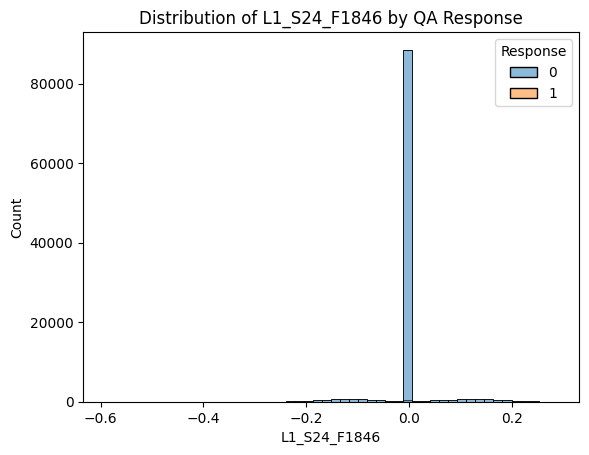

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_col = top_features[0][0]
sns.histplot(data=numeric, x=top_col, hue="Response", bins=50)
plt.title(f'Distribution of {top_col} by QA Response')
plt.show()